Inicializar

In [1]:
import os
from PIL import Image
from image_similarity_measures.evaluate import evaluation
import bitmath
import matplotlib.pyplot as plt

def get_size_format(b, factor=1024, suffix="B"):
    for unit in ["", "K", "M", "G", "T", "P", "E", "Z"]:
        if b < factor:
            return f"{b:.2f}{unit}{suffix}"
        b /= factor
    return f"{b:.2f}Y{suffix}"


if not os.path.exists("input"):
    os.makedirs("input")
    
if not os.path.exists("output"):
    os.makedirs("output")

Comprimir

In [ ]:
def compression(path, outputPath = "output", quality = 90, extension = None, optimize = False):
    img = Image.open(path)
    imgSize = os.path.getsize(path)
    nameImg, imgExtenssion = os.path.splitext(os.path.basename(path))
    outputPath = f"{outputPath}/{nameImg}"
    
    if extension is None:
        extension = imgExtenssion
        
    if not os.path.exists(outputPath):
        os.makedirs(outputPath)
    
    outputFilePath = f"{outputPath}/{nameImg}_compressed_{quality}{extension}"
    img.save(outputFilePath, quality = quality, optimize = optimize)
    compressedSize = os.path.getsize(outputFilePath)
    
    print(f"in quality {quality} redution of {(imgSize-compressedSize)/imgSize*100:.2f}%")



qualities = range(10,100,10)
for quality in qualities:
    compression("input/Imagem112KB.jpg", "output", quality, None, True)

Analize da redução de qualidade (Perda de qualidade em função do nivel de compressão)

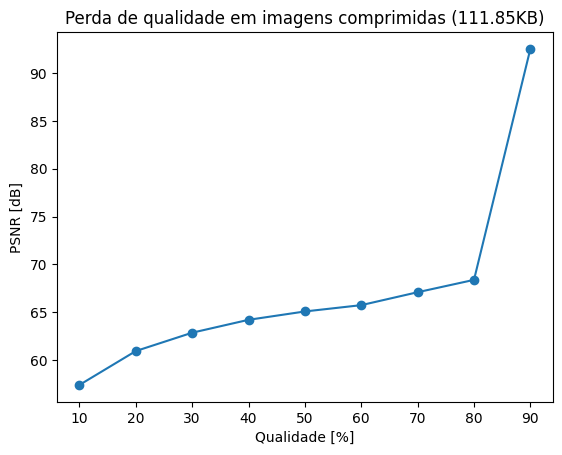

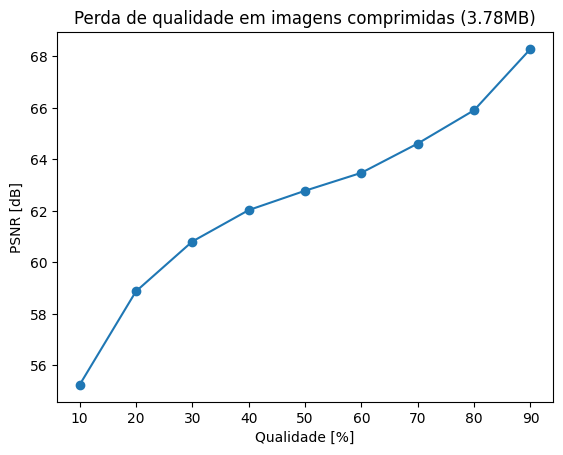

In [7]:
def qualityLoss(img, dir = "output", x = qualities):
    y = []
    imgName, imgExtension = os.path.splitext(img)
    for quality in x:
        y.append(evaluation(f"input/{img}", f"{dir}/{imgName}/{imgName}_compressed_{quality}{imgExtension}", ["psnr"])["psnr"])
        
    plt.plot(x, y, marker='o')
    plt.xlabel("Qualidade [%]")
    plt.ylabel("PSNR [dB]")
    plt.title(f"Perda de qualidade em imagens comprimidas ({get_size_format(os.path.getsize('input/'+img))})")
    plt.show()
    

qualityLoss("Imagem112KB.jpg")
qualityLoss("Imagem4MB.jpg")